<a href="https://colab.research.google.com/github/jy6zheng/TwitterDisasterTweets/blob/master/TwitterTabular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.text import *
from fastai.tabular import *

In [0]:
path = Path(base_dir + '/data/twitter')
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/content/gdrive/My Drive/fastai-v3/data/twitter')

In [0]:
table = pd.read_csv(path/'train.csv')
table = table[['keyword', 'location', 'text', 'target']]
table.fillna('None', inplace= True)
table = table.sample(frac=1, random_state=1).reset_index(drop=True)
train_table = table
# [0:6112]
# valid_table = table[6112:7613]

In [0]:
data_lm = load_data(path, 'data_lm.pkl')

In [0]:
text_data = (TextList.from_df(table, cols=['text'], vocab=data_lm.vocab)
 .split_none()
 .label_from_df('target')
 .databunch(bs = 50))
text_data

TextClasDataBunch;

Train: LabelList (7613 items)
x: TextList
xxbos xxmaj xxunk man xxmaj henry xxmaj van xxmaj xxunk missing : xxmaj emergency services are searching for a xxmaj xxunk man who xxunk from xxunk _ http : / / t.co / xxunk,xxbos xxmaj the things we fear most in organizations -- xxunk xxunk xxunk -- are the primary sources of creativity . - xxmaj xxunk xxmaj xxunk,xxbos xxunk ? ? hey xxmaj xxunk,xxbos xxup @potus you until you drown by water entering the lungs . xxmaj you being alive has caused this great country to fall to shit because you 're a pussy,xxbos xxmaj xxunk in my skin 
  xxmaj these wounds they will not xxunk
y: CategoryList
1,0,0,0,1
Path: .;

Valid: LabelList (0 items)
x: TextList

y: CategoryList

Path: .;

Test: None

In [0]:
text_data.save('text_data.pkl')

In [0]:
shutil.move("/content/text_data.pkl", "/content/gdrive/My Drive/fastai-v3/data/twitter")

In [0]:
text_data = load_data(path, 'text_data.pkl')

In [0]:
learn = text_classifier_learner(text_data, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc');

In [0]:
learn.load('final');

In [0]:
preds, target = learn.get_preds(ds_type=DatasetType.Fix)

In [0]:
prob = preds.numpy()

In [0]:
target[0:10]

tensor([1, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [0]:
prob_false = [item[0] for item in prob]

In [0]:
prob_false[0]

0.09878812

In [0]:
prob_true = [item[1] for item in prob]
prob_true[0]

0.90121186

In [0]:
train_table['true'] = pd.Series(prob_true, index=train_table.index)
train_table['false'] = pd.Series(prob_false, index=train_table.index)

In [0]:
train_table.drop(['text'], axis=1, inplace=True)

In [0]:
train_table

,keyword,location,target,true,false
0,emergency%20services,"Sydney, New South Wales",1,0.901212,0.098788
1,fear,None,0,0.240022,0.759978
2,tsunami,Land Of The Kings,0,0.044221,0.955779
3,drown,None,0,0.244501,0.755499
4,wounds,"cody, austin follows ?*?",1,0.183939,0.816061
...,...,...,...,...,...
7608,bloody,None,0,0.097283,0.902717
7609,obliterated,None,0,0.179528,0.820472
7610,flooding,"Kualar Lumpur, Malaysia",1,0.996749,0.003251
7611,annihilated,Û¢ Views From The Six Û¢,0,0.120587,0.879413


In [0]:
preds, target = learn.get_preds(ds_type=DatasetType.Valid)

In [0]:
prob = preds.numpy()
prob_false = [item[0] for item in prob]
prob_true = [item[1] for item in prob]

In [0]:
valid_table['true'] = pd.Series(prob_true, index=valid_table.index)
valid_table['false'] = pd.Series(prob_false, index=valid_table.index)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
valid_table.drop(['text'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
valid_table()

,keyword,location,target,true,false
6112,eyewitness,"Orlando, Fl",0,0.929200,0.070800
6113,destruction,??????? ??????? ????????,1,0.974528,0.025472
6114,windstorm,"Austin, Texas",0,0.482731,0.517269
6115,hailstorm,None,1,0.895963,0.104037
6116,trapped,None,0,0.288327,0.711673
...,...,...,...,...,...
7608,bloody,None,0,0.097283,0.902717
7609,obliterated,None,0,0.179528,0.820472
7610,flooding,"Kualar Lumpur, Malaysia",1,0.996749,0.003251
7611,annihilated,Û¢ Views From The Six Û¢,0,0.150294,0.849706


In [0]:
test_table = pd.read_csv(path/'test.csv')
test_table.fillna('None', inplace= True)
test_table

,id,keyword,location,text
0,0,None,None,Just happened a terrible car crash
1,2,None,None,"Heard about #earthquake is different cities, s..."
2,3,None,None,"there is a forest fire at spot pond, geese are..."
3,9,None,None,Apocalypse lighting. #Spokane #wildfires
4,11,None,None,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,None,None,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,None,None,Storm in RI worse than last hurricane. My city...
3260,10868,None,None,Green Line derailment in Chicago http://t.co/U...
3261,10874,None,None,MEG issues Hazardous Weather Outlook (HWO) htt...


In [0]:
test_textdata = TextList.from_df(test_table, cols='text')

In [0]:
test_textdata

TextList (3263 items)
Just happened a terrible car crash,Heard about #earthquake is different cities, stay safe everyone.,there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all,Apocalypse lighting. #Spokane #wildfires,Typhoon Soudelor kills 28 in China and Taiwan
Path: .

In [0]:
text_data.add_test(test_textdata)

In [0]:
preds, target = learn.get_preds(ds_type=DatasetType.Test)

In [0]:
preds

tensor([[0.1848, 0.8152],
        [0.0185, 0.9815],
        [0.0049, 0.9951],
        ...,
        [0.0017, 0.9983],
        [0.1574, 0.8426],
        [0.1648, 0.8352]])

In [0]:
prob = preds.numpy()
prob_false = [item[0] for item in prob]
prob_true = [item[1] for item in prob]
test_table['true'] = pd.Series(prob_true, index=test_table.index)
test_table['false'] = pd.Series(prob_false, index=test_table.index)

In [0]:
test_table.drop(['text'], axis=1, inplace=True)

In [0]:
test_table

,id,keyword,location,true,false
0,0,None,None,0.815184,0.184816
1,2,None,None,0.981467,0.018533
2,3,None,None,0.995143,0.004857
3,9,None,None,0.948623,0.051377
4,11,None,None,0.999971,0.000029
...,...,...,...,...,...
3258,10861,None,None,0.871199,0.128801
3259,10865,None,None,0.968457,0.031543
3260,10868,None,None,0.998257,0.001743
3261,10874,None,None,0.842624,0.157376


In [0]:
dep_var = 'target'
cat_names = ['location', 'keyword']
cont_names = ['true', 'false']
procs = [FillMissing, Categorify, Normalize]

In [0]:
test = TabularList.from_df(test_table, path=path, cat_names=cat_names, cont_names=cont_names)

In [0]:
tab_data = (TabularList.from_df(train_table, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(6112,7613)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())
tab_data

TabularDataBunch;

Train: LabelList (6112 items)
x: TabularList
location Sydney, New South Wales; keyword emergency%20services; true 1.1461; false -1.1461; ,location None; keyword fear; true -0.6774; false 0.6774; ,location Land Of The Kings; keyword tsunami; true -1.2174; false 1.2174; ,location None; keyword drown; true -0.6651; false 0.6651; ,location cody, austin follows ?*?; keyword wounds; true -0.8321; false 0.8321; 
y: CategoryList
1,0,0,0,1
Path: /content/gdrive/My Drive/fastai-v3/data/twitter;

Valid: LabelList (1501 items)
x: TabularList
location Orlando, Fl; keyword eyewitness; true 1.2268; false -1.2268; ,location #na#; keyword destruction; true 1.3453; false -1.3453; ,location Austin, Texas; keyword windstorm; true 0.0073; false -0.0073; ,location None; keyword hailstorm; true 1.1365; false -1.1365; ,location None; keyword trapped; true -0.5093; false 0.5093; 
y: CategoryList
0,1,0,1,0
Path: /content/gdrive/My Drive/fastai-v3/data/twitter;

Test: LabelList (3263 items)
x:

In [0]:
tab_data.show_batch(rows=10)

location,keyword,true,false,target
USA,emergency,-1.0593,1.0593,0
None,devastated,1.4069,-1.4069,1
USA,casualties,1.2672,-1.2672,1
y(our) boyfriends legs,airplane%20accident,-0.6231,0.6231,0
California,bridge%20collapse,1.1813,-1.1813,1
None,hail,-0.2778,0.2778,0
"Newcastle, OK",violent%20storm,-0.0376,0.0376,0
None,derail,1.4127,-1.4127,1
None,natural%20disaster,0.8741,-0.8741,1
"Washington DC / Nantes, France",derailed,1.3574,-1.3574,1


In [0]:
tab_data.save('tab_data.pkl')

In [0]:
tab_data = load_data(path,'tab_data.pkl')

In [0]:
learn = tabular_learner(tab_data, layers=[1000, 500], emb_drop = 0.04, metrics=accuracy)

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


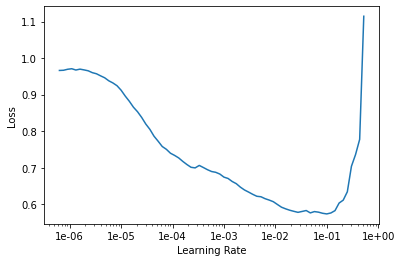

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.419621,0.410770,0.826782,00:03


In [0]:
preds, target = learn.get_preds(ds_type=DatasetType.Test)

In [0]:
preds

tensor([[5.2063e-09, 1.0000e+00],
        [7.1715e-14, 1.0000e+00],
        [2.6767e-14, 1.0000e+00],
        ...,
        [2.1368e-14, 1.0000e+00],
        [9.0415e-10, 1.0000e+00],
        [1.4493e-09, 1.0000e+00]])